**This notebook is an exercise in the [Feature Engineering](https://www.kaggle.com/learn/feature-engineering) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/mutual-information).**

---


### Introduction

- Encountering a new dataset can feel quite exhaustingly overwhelming. Immersed with hundreds or thousands of features without even a description, therfore how to process and its beginnings.



- Great imperative step is to construct a ranking with a **feature utility metric**,  function measuring associations between a **feature and a target**.

- Selecting a **smaller set of the most crucial features** to develop initially and have more confidence that your time is spent fruitful. 


- The metric we'll use is called **"mutual information"**. Mutual information is lot like correlation in that it measures a relationship between two quantities. 


- The advantage of mutual information is that it can **detect any kind of relationship** while correlation only detects **linear relationships**.

- Mutual information is a great general-purpose metric and especially useful at the start of feature development.

 i) Easy to use and interpret 
 ii) Computationally efficient
 iii) Theortically well-founded
 iv) Resistant to overfitting, and,  
 v) Able to detect any kind of relationship.

### Mutual Information and what is Measures

- Mutual information describes relationship in **terms of uncertainty**. The mutual informaton (MI) between two quantities is a **measure of the extent to which knowledge of one quantity reduces uncertainty about the other**.


- If you understand the value of a feature, how much confident would you associate in relation to the target accordingly.

-> Here's an example from the Ames Housing data:

Shows the relationship between the exterior quality of a house and the price it sold for. Each point represent a house.

- Knowing the value of ExterQual should generate more certainty about the correspounding SalePrice. Each category of ExterQual tends to concentrate SalePrice to within a certain range respectively.

Note: 
- The mutual information that ExterQual has with SalePrice is the average reduction of uncertinty in SalePrice consumed over the four values of ExterQual.
Summary: 

-> Knowing the exterior quality of a house reduces uncertainty about its sale price.
-> Since Fair occurs less often than Typical, for instance, Fair gets less weight in the MI score.



## Insight Breakdown of MI and its metric measurement.

Note: 
- Uncertainty is measured using a quantity from infromation theory known as "entropy"

- Entropy of a variable means roughly: "how many yes-or-no questions you would need to describe an occurance of that variable, on average."

- The more questions proposed, the more uncertainity must be about the variable.

=> Mutual information is how many questions you'd expect the feature to answer about the target.



## Interpreting Mutual Information Scores

- The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent.

- Conversely, in theory there's no upper bound to what MI can be.

N.B: 

Left: Mutual information increases as the dependence between feature and target becomes tighter.

Right: Mutual information can capture any kind of association (not just linear, like correlation). 

Here are some of things to remeber in application of mutual information:

i) MI can assist in understanding the relative potential of a feature as a predictor of the target, considered by itself.

ii) It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI can't detect interactions between features, its a univariate metric.

iii) Actual usefulness of a feature depends on the model incoporated. A feature is only useful to extent that its relationship with the target is one your model can learn.


iv) Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information.

## Excersie 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
auto_R = pd.read_csv("../input/fe-course-data/autos.csv")

/tmp/ipykernel_76/482094516.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
auto_R.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


- scikit-learn algorithm for MI treats discrete features differently from continous features.

- Consequently, need to inform upon selectional choices. Anything that must poesses a float dtype is not discrete.

    - Categoricals (object or categorical dtype) can be treated as discrete by giving them a label encoding.
    
  

In [3]:
X = auto_R.copy()
y = X.pop("price")

#Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
    # All discrete features should now have integer dtypes
discrete_features = X.dtypes == int

In [ ]:
X = auto_R.copy()
y= X.pop("price")

for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()

    # A

- The factorize() function is used to encode the object as an enumerated type or categorical variable. 

- This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

In [4]:
labels, uniques = pd.factorize(['q', 'q', 'p', 'r', 'q'])
labels

/tmp/ipykernel_76/768559070.py:1: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  labels, uniques = pd.factorize(['q', 'q', 'p', 'r', 'q'])


array([0, 0, 1, 2, 0])

In [5]:
uniques

array(['q', 'p', 'r'], dtype=object)

- Returns:

  - Labels - ndarray
      - An integer ndarray that's an indexer into uniques. uniques.take(labels) will have the same values as values.
      
  
  - uniques - ndarray, Index, or Categorical.
  
 - Unique valid values. When Values is categorical, uniques is a categorical; values is some other pandas object, an Index is returned. Otherwise, a 1-D ndarray is returned.  
 

- Scikit-learn has two **mutual information metrics** in its feature_selection module: one for **real-valued targets (mutual_info_regression)** and one for **categorical targets (mutual_info_classif)**. 

- Our target, price is real-valued. The next call computes the MI scores for our features and wraps them up in a nice dataframe.


In [6]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X,y,discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features= discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

curb_weight          1.464807
highway_mpg          0.952702
length               0.603499
bore                 0.512079
stroke               0.389832
drive_wheels         0.332490
compression_ratio    0.132845
fuel_type            0.048139
Name: MI Scores, dtype: float64

In [ ]:
def make_mi_scores(X,y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features= discrete_features)
    mi_Scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_Scores.sort_values(ascending=False)
    
    return mi_scores

mi_scores = make_mi_scores(X,y, discree_features)
mi_scores[::3]

In [7]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width,ticks)
    plt.title("Mutual Information Scores")
    

In [ ]:
def plot_mi_Scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arrange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.ytickets(width, ticks)
    plt.title("Mutual Information Score")

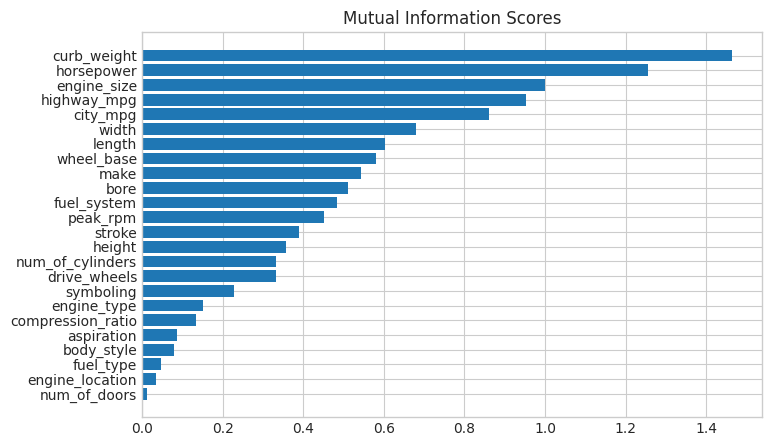

In [8]:
plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)

In [9]:
np.arange(len(mi_scores))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [10]:
list(mi_scores.index)

['curb_weight',
 'horsepower',
 'engine_size',
 'highway_mpg',
 'city_mpg',
 'width',
 'length',
 'wheel_base',
 'make',
 'bore',
 'fuel_system',
 'peak_rpm',
 'stroke',
 'height',
 'num_of_cylinders',
 'drive_wheels',
 'symboling',
 'engine_type',
 'compression_ratio',
 'aspiration',
 'body_style',
 'fuel_type',
 'engine_location',
 'num_of_doors']

- Data visualisation is a great follow-up to a utility ranking. Let's take a closer inspection at a couple of these;

- As expected, the high-scoring curb-weight feature exhibits strong relationship with price, the target,


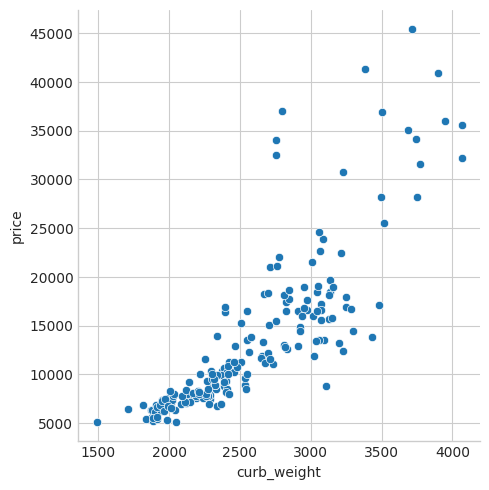

In [11]:
sns.relplot(x='curb_weight', y='price', data=auto_R)

- 'Fuel_type' feature has a fairly low MI score, but we can inspect from figure, it clearly separate two price populations with different trends within the horsepower feature. 

- This indicates that 'fuel_type' contributes an interaction effect and mightn't be unimportant after all.


- Deciding a feature is unimportant from its MI score, its's good to investigate any possible interaction effects-- domain knowledge can offer a lot of guidance here.


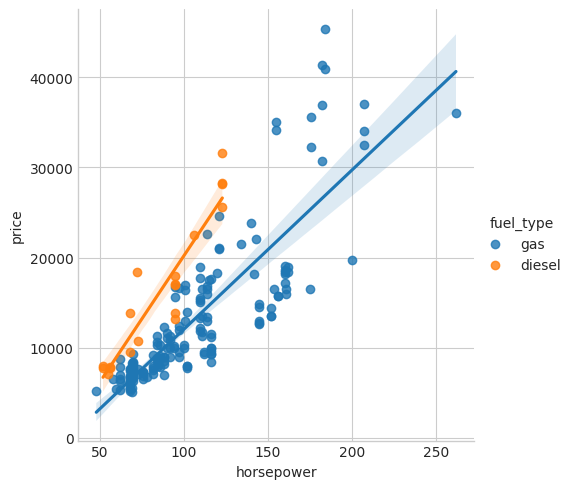

In [12]:
sns.lmplot(x='horsepower', y='price',hue="fuel_type", data=auto_R)

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Introduction #

In this exercise you'll identify an initial set of features in the [*Ames*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) dataset to develop using mutual information scores and interaction plots.

Run this cell to set everything up!

In [13]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.feature_engineering_new.ex2 import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


# Load data
df = pd.read_csv("../input/fe-course-data/ames.csv")


# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

/tmp/ipykernel_76/3242193518.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [ ]:
from learntools.core import binder
binder.bind(globals())
from learntools.feature_engineering_new.ex2 import *


import matplot.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import  mutual_info_regression


In [14]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [ ]:
def make_mi_Scores(X,y):
    X = X.copy()
    for colname in X.select_dtypes(["",""]):
        X[colname], _ = X[colname].factorise()
      # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index= X.columns)
    mi_scores = scores.sort_values(ascending=False)
    
    return mi_scores
    
    


-------------------------------------------------------------------------------

To start, let's review the meaning of mutual information by looking at a few features from the *Ames* dataset.

melt(id_vars=None, value_vars=None, var_name=None, value_name: Hashable="value", col_level: Level | None=None, ignore_index: bool=True) -> DataFrame

In [ ]:
features = [" "," ", " "]
sns.relpot(
    x='value', y='Saleprice', col='variable', data=df.melt(is_vars="Saleprice", value_vars=features),facet_kws=dict(sharex=False),
);

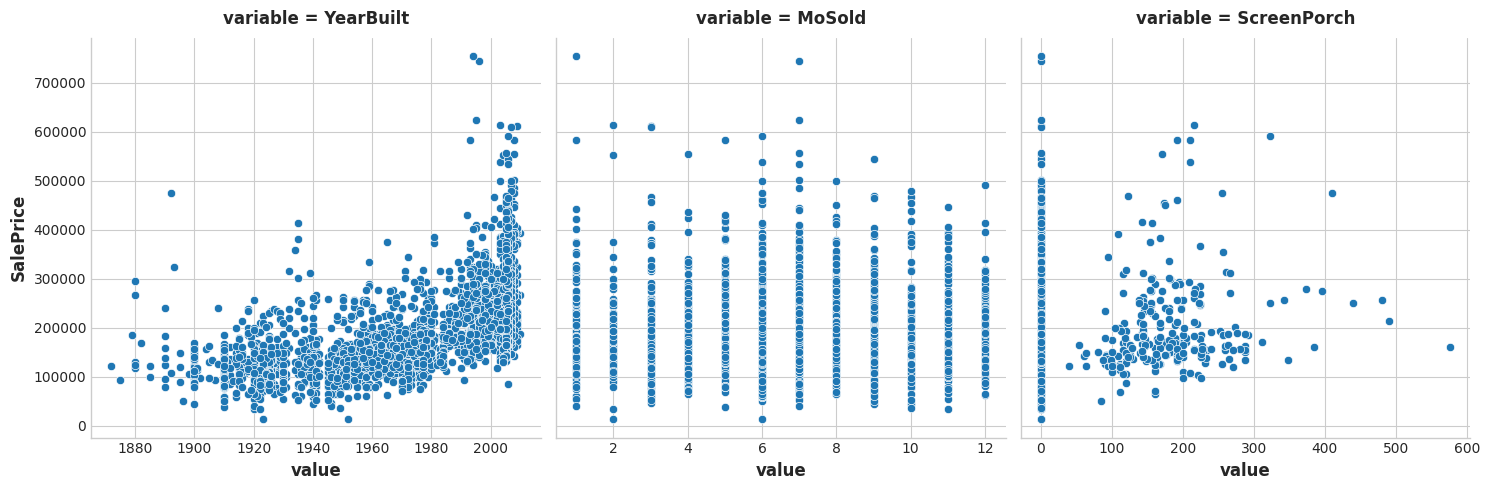

In [15]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

# 1) Understand Mutual Information

Based on the plots, which feature do you think would have the highest mutual information with `SalePrice`?

In [16]:
# View the solution (Run this cell to receive credit!)
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Based on the plots, `YearBuilt` should have the highest MI score since knowing the year tends to constrain `SalePrice` to a smaller range of possible values. This is generally not the case for `MoSold`, however. Finally, since `ScreenPorch` is usually just one value, 0, on average it won't tell you much about `SalePrice` (though more than `MoSold`) .

-------------------------------------------------------------------------------

The *Ames* dataset has seventy-eight features -- a lot to work with all at once! Fortunately, you can identify the features with the most potential.

Use the `make_mi_scores` function (introduced in the tutorial) to compute mutual information scores for the *Ames* features:


In [17]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

Now examine the scores using the functions in this cell. Look especially at top and bottom ranks.

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64


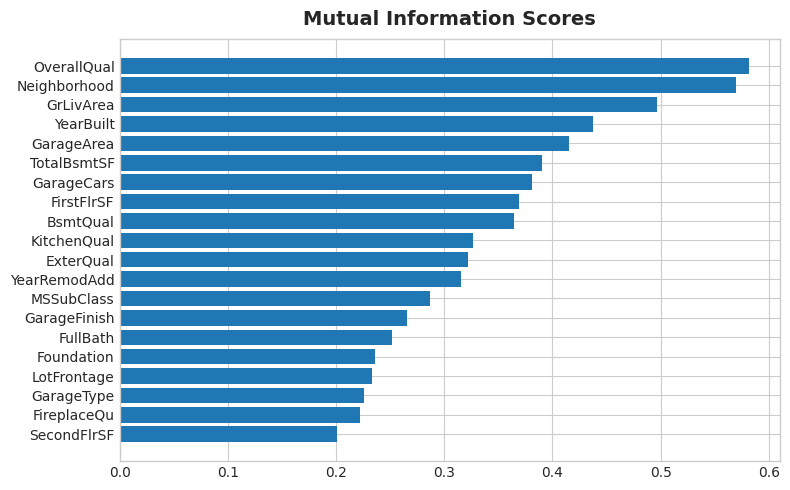

In [18]:
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

# 2) Examine MI Scores

Do the scores seem reasonable? Do the high scoring features represent things you'd think most people would value in a home? Do you notice any themes in what they describe? 

In [19]:
# View the solution (Run this cell to receive credit!)
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Some common themes among most of these features are:
- Location: `Neighborhood`
- Size: all of the `Area` and `SF` features, and counts like `FullBath` and `GarageCars`
- Quality: all of the `Qual` features
- Year: `YearBuilt` and `YearRemodAdd`
- Types: descriptions of features and styles like `Foundation` and `GarageType`

These are all the kinds of features you'll commonly see in real-estate listings (like on Zillow), It's good then that our mutual information metric scored them highly. On the other hand, the lowest ranked features seem to mostly represent things that are rare or exceptional in some way, and so wouldn't be relevant to the average home buyer.


-------------------------------------------------------------------------------

In this step you'll investigate possible interaction effects for the `BldgType` feature. This feature describes the broad structure of the dwelling in five categories:

> Bldg Type (Nominal): Type of dwelling
>		
>       1Fam	Single-family Detached	
>       2FmCon	Two-family Conversion; originally built as one-family dwelling
>       Duplx	Duplex
>       TwnhsE	Townhouse End Unit
>       TwnhsI	Townhouse Inside Unit

The `BldgType` feature didn't get a very high MI score. A plot confirms that the categories in `BldgType` don't do a good job of distinguishing values in `SalePrice` (the distributions look fairly similar, in other words):

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

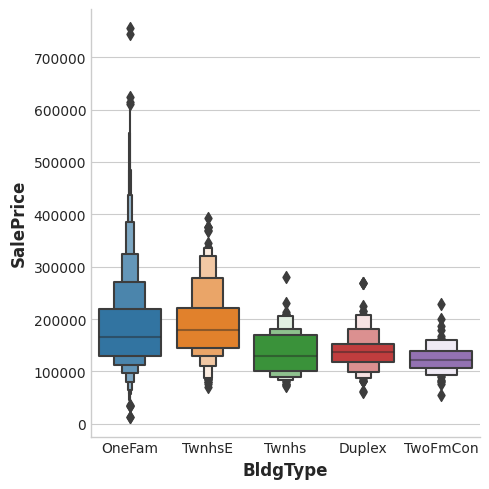

In [20]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

Still, the type of a dwelling seems like it should be important information. Investigate whether `BldgType` produces a significant interaction with either of the following:

```
GrLivArea  # Above ground living area
MoSold     # Month sold
```

Run the following cell twice, the first time with `feature = "GrLivArea"` and the next time with `feature="MoSold"`:

lmplot(data=None, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers="o", sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci="ci", scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)

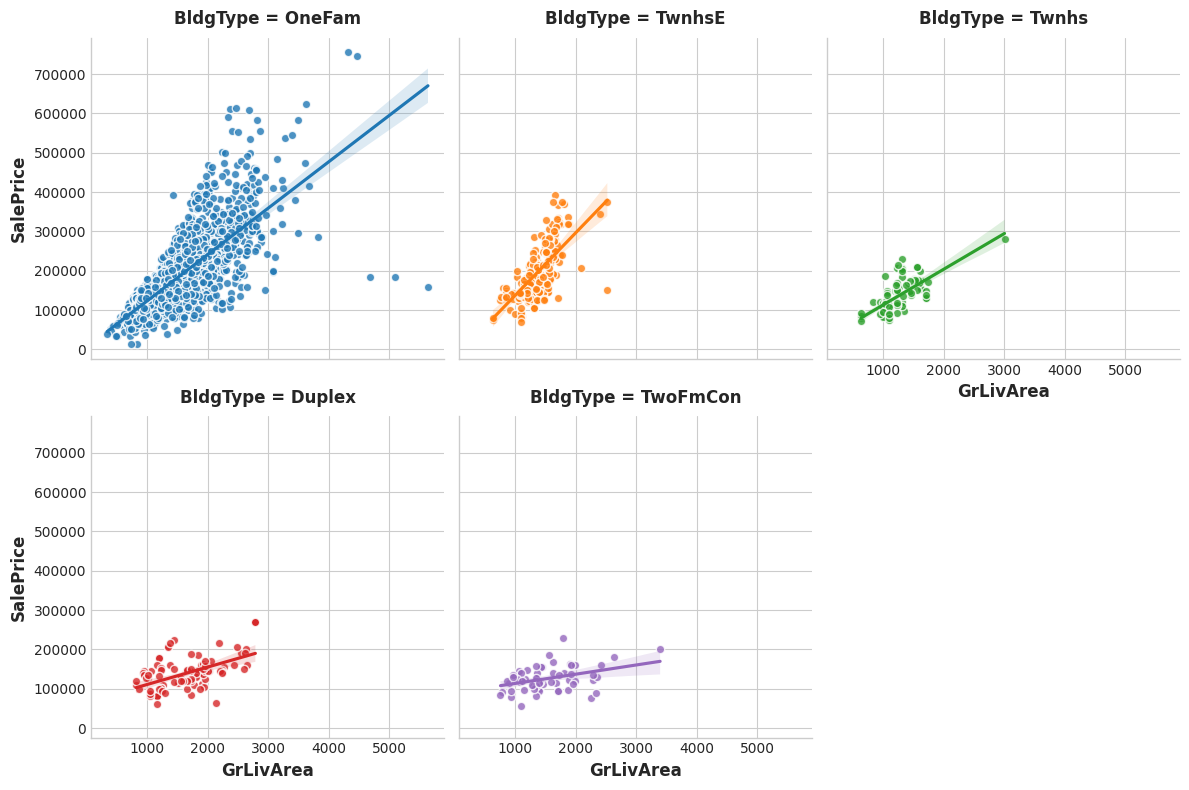

In [27]:
feature = "GrLivArea"

sns.lmplot(
    x=feature,y="SalePrice", hue="BldgType",col="BldgType", 
    data = df, scatter_kws={"edgecolor": 'w'}, col_wrap= 3 ,height=4,
);

In this step you'll investigate possible interaction effects for the BldgType feature. This feature describes the broad structure of the dwelling in five categories:

> Bldg Type (Nominal): Type of dwelling
>       
>       1Fam    Single-family Detached  
>       2FmCon  Two-family Conversion; originally built as one-family dwelling
>       Duplx   Duplex
>       TwnhsE  Townhouse End Unit
>       TwnhsI  Townhouse Inside Unit

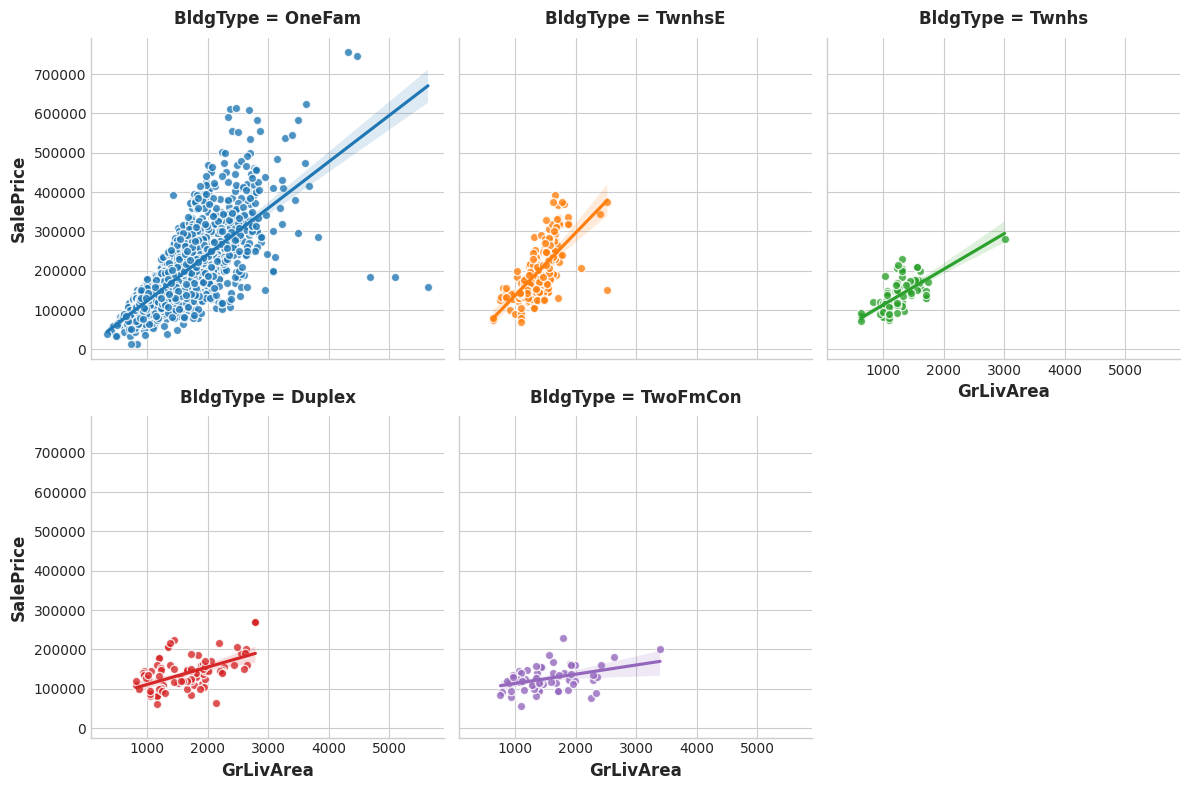

In [21]:
# YOUR CODE HERE: 
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

The trend lines being significantly different from one category to the next indicates an interaction effect.

# 3) Discover Interactions

From the plots, does `BldgType` seem to exhibit an interaction effect with either `GrLivArea` or `MoSold`?

In [28]:
# View the solution (Run this cell to receive credit!)
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The trends lines within each category of `BldgType` are clearly very different, indicating an interaction between these features. Since knowing `BldgType` tells us more about how `GrLivArea` relates to `SalePrice`, we should consider including `BldgType` in our feature set.

The trend lines for `MoSold`, however, are almost all the same. This feature hasn't become more informative for knowing `BldgType`.

# A First Set of Development Features #

Let's take a moment to make a list of features we might focus on. In the exercise in Lesson 3, you'll start to build up a more informative feature set through combinations of the original features you identified as having high potential.

You found that the ten features with the highest MI scores were:

In [ ]:
mi_scores.head(10)

Do you recognize the themes here? Location, size, and quality. You needn't restrict development to only these top features, but you do now have a good place to start. Combining these top features with other related features, especially those you've identified as creating interactions, is a good strategy for coming up with a highly informative set of features to train your model on.

# Keep Going #

[**Start creating features**](https://www.kaggle.com/ryanholbrook/creating-features) and learn what kinds of transformations different models are most likely to benefit from.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*